In [259]:
#Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [260]:
#Loading dataset
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df["sex"]=df["sex"].apply(lambda x: 1 if x=="Male" else 0)

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [43]:
new_df=pd.concat([df.iloc[:,0:3],pd.get_dummies(df.iloc[:,3:6])],axis=1)
new_df.head()

,total_bill,tip,sex,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,0,0,1,0,0,0,1,0,1
1,10.34,1.66,1,0,1,0,0,0,1,0,1
2,21.01,3.50,1,0,1,0,0,0,1,0,1
3,23.68,3.31,1,0,1,0,0,0,1,0,1
4,24.59,3.61,0,0,1,0,0,0,1,0,1


In [91]:
new_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker_Yes', 'smoker_No', 'day_Thur',
       'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner'],
      dtype='object')

In [92]:
new=new_df[['total_bill', 'sex',"tip", 'smoker_Yes', 'smoker_No', 'day_Thur',
       'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']]

new.head()

,total_bill,sex,tip,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,0,1.01,0,1,0,0,0,1,0,1
1,10.34,1,1.66,0,1,0,0,0,1,0,1
2,21.01,1,3.50,0,1,0,0,0,1,0,1
3,23.68,1,3.31,0,1,0,0,0,1,0,1
4,24.59,0,3.61,0,1,0,0,0,1,0,1


In [194]:
X=new.iloc[:,2:]
y=new[["total_bill","sex"]]

In [195]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [266]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_x.fit(X_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)


In [265]:
#Importing libraries to create the Neural Network using the Keras Functional API
from keras.layers import Dense,Input,BatchNormalization
from keras.models import Model

In [224]:
input=Input(shape=(shape,))
model=Dense(100,activation="relu")(input)
model=Dense(200,activation="relu")(model)
model_reg=Dense(1)(model)
model_reg=BatchNormalization()(model_reg)
model_cla=Dense(1,activation="sigmoid")(model_reg)
modelo=Model(input,[model_reg,model_cla])

In [225]:
modelo.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 9)]               0         
                                                                 
 dense_29 (Dense)            (None, 100)               1000      
                                                                 
 dense_30 (Dense)            (None, 200)               20200     
                                                                 
 dense_31 (Dense)            (None, 1)                 201       
                                                                 
 batch_normalization_3 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 dense_32 (Dense)            (None, 1)                 2         
                                                           

In [237]:
modelo.compile(optimizer="adam",loss=["mse","binary_crossentropy"],metrics=["mse","accuracy"])
history=modelo.fit(X_train,[y_train.iloc[:,0],y_train.iloc[:,1]],epochs=200,validation_split=0.3,batch_size=32)

Epoch 1/200
4/4 [==============================] - 3s 242ms/step - loss: 442.7503 - batch_normalization_3_loss: 441.8911 - dense_32_loss: 0.8592 - batch_normalization_3_mse: 441.8911 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.3102 - dense_32_accuracy: 0.5339 - val_loss: 443.7948 - val_batch_normalization_3_loss: 442.9669 - val_dense_32_loss: 0.8278 - val_batch_normalization_3_mse: 442.9669 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.3049 - val_dense_32_accuracy: 0.4808
Epoch 2/200
4/4 [==============================] - 0s 24ms/step - loss: 442.4832 - batch_normalization_3_loss: 441.6144 - dense_32_loss: 0.8688 - batch_normalization_3_mse: 441.6144 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.3167 - dense_32_accuracy: 0.5000 - val_loss: 438.6823 - val_batch_normalization_3_loss: 437.8766 - val_dense_32_loss: 0.8056 - val_batch_normalization_3_mse: 437.8766 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse

Epoch 17/200
4/4 [==============================] - 0s 22ms/step - loss: 438.2885 - batch_normalization_3_loss: 437.4506 - dense_32_loss: 0.8379 - batch_normalization_3_mse: 437.4506 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.3054 - dense_32_accuracy: 0.5000 - val_loss: 437.3277 - val_batch_normalization_3_loss: 436.5463 - val_dense_32_loss: 0.7814 - val_batch_normalization_3_mse: 436.5463 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2878 - val_dense_32_accuracy: 0.4808
Epoch 18/200
4/4 [==============================] - 0s 22ms/step - loss: 439.1343 - batch_normalization_3_loss: 438.3128 - dense_32_loss: 0.8216 - batch_normalization_3_mse: 438.3128 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2977 - dense_32_accuracy: 0.5169 - val_loss: 437.3476 - val_batch_normalization_3_loss: 436.5739 - val_dense_32_loss: 0.7737 - val_batch_normalization_3_mse: 436.5739 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_ms

Epoch 33/200
4/4 [==============================] - 0s 22ms/step - loss: 435.9327 - batch_normalization_3_loss: 435.1343 - dense_32_loss: 0.7985 - batch_normalization_3_mse: 435.1343 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2926 - dense_32_accuracy: 0.5254 - val_loss: 437.8246 - val_batch_normalization_3_loss: 437.0489 - val_dense_32_loss: 0.7757 - val_batch_normalization_3_mse: 437.0489 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2864 - val_dense_32_accuracy: 0.4808
Epoch 34/200
4/4 [==============================] - 0s 22ms/step - loss: 435.4276 - batch_normalization_3_loss: 434.6304 - dense_32_loss: 0.7972 - batch_normalization_3_mse: 434.6304 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2917 - dense_32_accuracy: 0.5678 - val_loss: 433.3456 - val_batch_normalization_3_loss: 432.5734 - val_dense_32_loss: 0.7723 - val_batch_normalization_3_mse: 432.5734 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_ms

Epoch 49/200
4/4 [==============================] - 0s 23ms/step - loss: 431.4729 - batch_normalization_3_loss: 430.7018 - dense_32_loss: 0.7712 - batch_normalization_3_mse: 430.7018 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2797 - dense_32_accuracy: 0.5593 - val_loss: 431.0154 - val_batch_normalization_3_loss: 430.2488 - val_dense_32_loss: 0.7666 - val_batch_normalization_3_mse: 430.2488 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2823 - val_dense_32_accuracy: 0.5192
Epoch 50/200
4/4 [==============================] - 0s 23ms/step - loss: 431.1367 - batch_normalization_3_loss: 430.3640 - dense_32_loss: 0.7727 - batch_normalization_3_mse: 430.3640 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2804 - dense_32_accuracy: 0.5424 - val_loss: 437.0049 - val_batch_normalization_3_loss: 436.2343 - val_dense_32_loss: 0.7706 - val_batch_normalization_3_mse: 436.2343 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_ms

Epoch 65/200
4/4 [==============================] - 0s 23ms/step - loss: 428.1955 - batch_normalization_3_loss: 427.4544 - dense_32_loss: 0.7411 - batch_normalization_3_mse: 427.4544 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2691 - dense_32_accuracy: 0.5593 - val_loss: 429.4352 - val_batch_normalization_3_loss: 428.6648 - val_dense_32_loss: 0.7704 - val_batch_normalization_3_mse: 428.6648 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2837 - val_dense_32_accuracy: 0.5192
Epoch 66/200
4/4 [==============================] - 0s 22ms/step - loss: 428.7214 - batch_normalization_3_loss: 427.9804 - dense_32_loss: 0.7410 - batch_normalization_3_mse: 427.9804 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2696 - dense_32_accuracy: 0.5424 - val_loss: 424.9785 - val_batch_normalization_3_loss: 424.2173 - val_dense_32_loss: 0.7612 - val_batch_normalization_3_mse: 424.2173 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_ms

Epoch 81/200
4/4 [==============================] - 0s 22ms/step - loss: 425.8415 - batch_normalization_3_loss: 425.1290 - dense_32_loss: 0.7125 - batch_normalization_3_mse: 425.1290 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2564 - dense_32_accuracy: 0.6271 - val_loss: 424.8504 - val_batch_normalization_3_loss: 424.1015 - val_dense_32_loss: 0.7490 - val_batch_normalization_3_mse: 424.1015 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2751 - val_dense_32_accuracy: 0.5000
Epoch 82/200
4/4 [==============================] - 0s 22ms/step - loss: 424.6434 - batch_normalization_3_loss: 423.9212 - dense_32_loss: 0.7222 - batch_normalization_3_mse: 423.9212 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2601 - dense_32_accuracy: 0.5678 - val_loss: 435.3618 - val_batch_normalization_3_loss: 434.6024 - val_dense_32_loss: 0.7594 - val_batch_normalization_3_mse: 434.6024 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_ms

Epoch 97/200
4/4 [==============================] - 0s 22ms/step - loss: 421.7714 - batch_normalization_3_loss: 421.0634 - dense_32_loss: 0.7080 - batch_normalization_3_mse: 421.0634 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2544 - dense_32_accuracy: 0.6017 - val_loss: 429.2180 - val_batch_normalization_3_loss: 428.4721 - val_dense_32_loss: 0.7459 - val_batch_normalization_3_mse: 428.4721 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2731 - val_dense_32_accuracy: 0.5000
Epoch 98/200
4/4 [==============================] - 0s 22ms/step - loss: 422.0086 - batch_normalization_3_loss: 421.3065 - dense_32_loss: 0.7021 - batch_normalization_3_mse: 421.3065 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2518 - dense_32_accuracy: 0.5763 - val_loss: 427.6112 - val_batch_normalization_3_loss: 426.8744 - val_dense_32_loss: 0.7369 - val_batch_normalization_3_mse: 426.8744 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_ms

Epoch 113/200
4/4 [==============================] - 0s 22ms/step - loss: 420.1115 - batch_normalization_3_loss: 419.4322 - dense_32_loss: 0.6793 - batch_normalization_3_mse: 419.4322 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2414 - dense_32_accuracy: 0.6356 - val_loss: 426.8315 - val_batch_normalization_3_loss: 426.0974 - val_dense_32_loss: 0.7341 - val_batch_normalization_3_mse: 426.0974 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2682 - val_dense_32_accuracy: 0.5577
Epoch 114/200
4/4 [==============================] - 0s 23ms/step - loss: 418.0583 - batch_normalization_3_loss: 417.3709 - dense_32_loss: 0.6875 - batch_normalization_3_mse: 417.3709 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2446 - dense_32_accuracy: 0.6356 - val_loss: 423.4930 - val_batch_normalization_3_loss: 422.7592 - val_dense_32_loss: 0.7337 - val_batch_normalization_3_mse: 422.7592 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_

Epoch 129/200
4/4 [==============================] - 0s 26ms/step - loss: 416.1743 - batch_normalization_3_loss: 415.5100 - dense_32_loss: 0.6643 - batch_normalization_3_mse: 415.5100 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2344 - dense_32_accuracy: 0.6695 - val_loss: 415.7497 - val_batch_normalization_3_loss: 415.0256 - val_dense_32_loss: 0.7241 - val_batch_normalization_3_mse: 415.0256 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2637 - val_dense_32_accuracy: 0.5577
Epoch 130/200
4/4 [==============================] - 0s 22ms/step - loss: 415.2913 - batch_normalization_3_loss: 414.6204 - dense_32_loss: 0.6709 - batch_normalization_3_mse: 414.6204 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2373 - dense_32_accuracy: 0.6610 - val_loss: 414.1146 - val_batch_normalization_3_loss: 413.3873 - val_dense_32_loss: 0.7273 - val_batch_normalization_3_mse: 413.3873 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_

Epoch 145/200
4/4 [==============================] - 0s 24ms/step - loss: 412.5595 - batch_normalization_3_loss: 411.9024 - dense_32_loss: 0.6572 - batch_normalization_3_mse: 411.9024 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2310 - dense_32_accuracy: 0.6695 - val_loss: 417.8505 - val_batch_normalization_3_loss: 417.1191 - val_dense_32_loss: 0.7314 - val_batch_normalization_3_mse: 417.1190 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2667 - val_dense_32_accuracy: 0.5577
Epoch 146/200
4/4 [==============================] - 0s 23ms/step - loss: 412.3074 - batch_normalization_3_loss: 411.6513 - dense_32_loss: 0.6561 - batch_normalization_3_mse: 411.6513 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2306 - dense_32_accuracy: 0.6695 - val_loss: 416.7797 - val_batch_normalization_3_loss: 416.0496 - val_dense_32_loss: 0.7301 - val_batch_normalization_3_mse: 416.0496 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_

Epoch 161/200
4/4 [==============================] - 0s 22ms/step - loss: 408.1241 - batch_normalization_3_loss: 407.4755 - dense_32_loss: 0.6485 - batch_normalization_3_mse: 407.4755 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2273 - dense_32_accuracy: 0.6695 - val_loss: 413.0119 - val_batch_normalization_3_loss: 412.2820 - val_dense_32_loss: 0.7299 - val_batch_normalization_3_mse: 412.2820 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2662 - val_dense_32_accuracy: 0.5577
Epoch 162/200
4/4 [==============================] - 0s 22ms/step - loss: 408.7070 - batch_normalization_3_loss: 408.0589 - dense_32_loss: 0.6481 - batch_normalization_3_mse: 408.0589 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2271 - dense_32_accuracy: 0.6695 - val_loss: 413.8255 - val_batch_normalization_3_loss: 413.0956 - val_dense_32_loss: 0.7299 - val_batch_normalization_3_mse: 413.0956 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_

Epoch 177/200
4/4 [==============================] - 0s 22ms/step - loss: 405.3595 - batch_normalization_3_loss: 404.7195 - dense_32_loss: 0.6400 - batch_normalization_3_mse: 404.7195 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2236 - dense_32_accuracy: 0.6695 - val_loss: 411.0754 - val_batch_normalization_3_loss: 410.3427 - val_dense_32_loss: 0.7327 - val_batch_normalization_3_mse: 410.3427 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2674 - val_dense_32_accuracy: 0.5577
Epoch 178/200
4/4 [==============================] - 0s 22ms/step - loss: 406.3279 - batch_normalization_3_loss: 405.6883 - dense_32_loss: 0.6396 - batch_normalization_3_mse: 405.6883 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2234 - dense_32_accuracy: 0.6695 - val_loss: 413.4642 - val_batch_normalization_3_loss: 412.7311 - val_dense_32_loss: 0.7332 - val_batch_normalization_3_mse: 412.7311 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_

Epoch 193/200
4/4 [==============================] - 0s 23ms/step - loss: 401.9534 - batch_normalization_3_loss: 401.3196 - dense_32_loss: 0.6337 - batch_normalization_3_mse: 401.3196 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2210 - dense_32_accuracy: 0.6695 - val_loss: 407.5319 - val_batch_normalization_3_loss: 406.7955 - val_dense_32_loss: 0.7364 - val_batch_normalization_3_mse: 406.7955 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_mse: 0.2689 - val_dense_32_accuracy: 0.5577
Epoch 194/200
4/4 [==============================] - 0s 25ms/step - loss: 401.8567 - batch_normalization_3_loss: 401.2232 - dense_32_loss: 0.6335 - batch_normalization_3_mse: 401.2232 - batch_normalization_3_accuracy: 0.0000e+00 - dense_32_mse: 0.2209 - dense_32_accuracy: 0.6695 - val_loss: 406.9362 - val_batch_normalization_3_loss: 406.2002 - val_dense_32_loss: 0.7360 - val_batch_normalization_3_mse: 406.2002 - val_batch_normalization_3_accuracy: 0.0000e+00 - val_dense_32_

In [238]:
results=np.array(modelo.evaluate(X_test,[y_test.iloc[:,0],y_test.iloc[:,1]],verbose=False))
print("MSE")
print(results[-2].round(3))
print("*"*10)
print("Accuracy")
print(results[-1].round(3))

MSE
0.228
**********
Accuracy
0.662


In [262]:
#Creating DataFrames for accuracy and MSE of the training and validation in the model

acc_val=pd.DataFrame(history.history)["val_dense_32_accuracy"]
acc_tra=pd.DataFrame(history.history)["dense_32_accuracy"]

mse_tra=pd.DataFrame(history.history)["dense_32_mse"]
mse_val=pd.DataFrame(history.history)["val_dense_32_mse"]

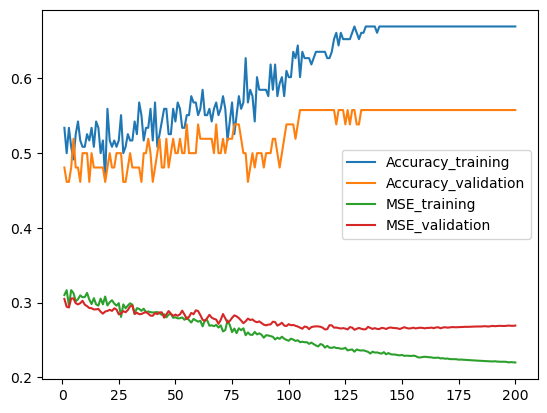

In [263]:
##Plotting accuracy and MSE
plt.plot(np.arange(1,201),acc_tra,label="Accuracy_training")
plt.plot(np.arange(1,201),acc_val,label="Accuracy_validation")
plt.plot(np.arange(1,201),mse_tra,label="MSE_training")
plt.plot(np.arange(1,201),mse_val,label="MSE_validation")
plt.legend();